In [1]:
import warnings                                   #Importing few important python libraries
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [2]:
df = pd.read_csv('project_data.txt')              #importing data_set 

In [3]:
print(df.head())
print(df.shape)
m=df.shape[0]

   6.1101   17.592
0  5.5277   9.1302
1  8.5186  13.6620
2  7.0032  11.8540
3  5.8598   6.8233
4  8.3829  11.8860
(96, 2)


In [4]:
x = df.iloc[:,0]
y = df.iloc[:,1]

In [5]:
df.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [6]:
df.describe()

,6.1101,17.592
count,96.000000,96.000000
mean,8.181151,5.716709
std,3.884451,5.404947
min,5.026900,-2.680700
25%,5.690950,1.952550
50%,6.735950,4.455300
75%,8.639925,6.879150
max,22.203000,24.147000


Text(0, 0.5, 'Profit in $10,000')

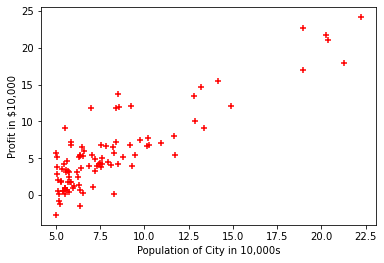

In [7]:
plt.scatter(x,y,marker='+', c='r')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')

In [8]:
def compute_cost(p, q, w, b):         
    m = x.shape[0] 
    total_cost = 0
    cost_sum=0
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost

In [9]:
initial_w = 2
initial_b = 1

cost = compute_cost(x, y, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 75.887


In [10]:
def compute_gradient(p, q, w, b):                         #Using gradient descent to reduce cost
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    dj_dw = 0
    dj_db = 0
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m     
    return dj_dw, dj_db

In [11]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x, y, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): -64.88968277207296 -5.716709374999997


In [12]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x, y, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -46.88085020596876 -3.880479166666666


In [13]:
def gradient_descent(p, q, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(p)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(p, q, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(p, q, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [14]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x ,y, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     5.90   
Iteration  150: Cost     4.43   
Iteration  300: Cost     4.02   
Iteration  450: Cost     3.79   
Iteration  600: Cost     3.65   
Iteration  750: Cost     3.57   
Iteration  900: Cost     3.52   
Iteration 1050: Cost     3.50   
Iteration 1200: Cost     3.48   
Iteration 1350: Cost     3.47   
w,b found by gradient descent: 1.1849957023502022 -3.926439005456633


In [15]:
m = x.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

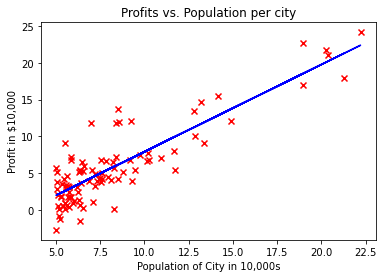

In [16]:
# Plot the linear fit
plt.plot(x, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x, y, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [17]:
predict1 = 5.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 9.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $25910.37
For population = 70,000, we predict a profit of $67385.22


In [18]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [19]:
def predict(X, w, b):
    m, n = X.shape   
    p = np.zeros(m)
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        for j in range(n): 
            z_wb += 0
        z_wb += b
        
        f_wb = sigmoid(z_wb)

        p[i] = 1 if f_wb>0.5 else 0
        
    return p

In [20]:
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (4,), value [0. 1. 1. 1.]
